In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import control as ctrl
import matplotlib.pyplot as plt
import vibrationtesting as vt
import numpy as np
import scipy as sp

In [2]:
dir(vt.system)

['__builtins__',
 '__cached__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__license__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'c2d',
 'd2c',
 'damp',
 'la',
 'math',
 'np',
 'serep',
 'sig',
 'so2ss',
 'sos_frf',
 'sos_modal',
 'ssfrf',
 'warnings']

In [4]:
help(vt.sos_frf)

Help on function sos_frf in module vibrationtesting.system:

sos_frf(M, C, K, Bt, Cd, Cv, Ca, omega_low, omega_high, in_index, out_index)
    FRF of second order system
    
    Given second order linear matrix equation of the form
    :math:`M\ddot{x} + C \dot{x} + K x= \tilde{B} u`
    and
    :math:`y = C_d x + C_v \dot{x} + C_a\ddot{x}`
    converts to state space form and returns the requested frequency response
    function
    
    Parameters
    ----------
    M, C, K, Bt, Cd, Cv, Cd : float arrays
        Mass , damping, stiffness, input, displacement sensor, velocimeter,
        and accelerometer matrices
    
    Returns
    -------
    omega : float array
            frequency vector
    H : float array
        frequency response function
    
    Examples not working for second order system
    
    Need to make one for second order expansion
    
    Examples
    --------
    >>> import vibrationtesting as vt
    >>> A = np.array([[ 0.,   0. ,  1.    ,  0.    ],
    ...  

In [51]:
A = np.array([[0.,   0.,  1.,  0.],
              [0.,   0.,  0.,  1.],
              [-1.4,  1.2, -0.0058, 0.0014],
              [0.8, -1.4,  0.0016, -0.0038]])
B = np.array([[0., 0.],
              [0., 0.],
              [1., 0.],
              [0., 1.]])
C = np.array([[1,0,0,0],[0,1,0,0]])
D = np.array([[0],[0]])
omega, H = vt.ssfrf(A, B, C, D, 0, 3.5, 0, 0)
#vt.frfplot(omega, H)

ValueError: Input 0 or output 0 infeasible.

In [10]:
H.shape

(1, 1000)

In [29]:
H_all = np.zeros((2,1000,2), dtype = 'complex128')
for i in np.arange(2):
    for j in np.arange(2):
        omega, H_all[i,:,j] = vt.ssfrf(A, B, C, D, 0, 3.5, i, j)
    print(i)

0
1


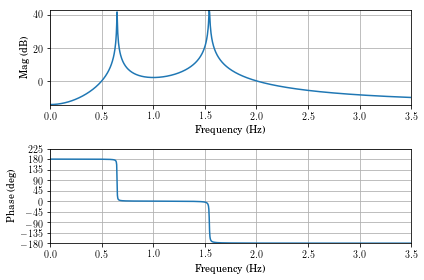

In [32]:
vt.frfplot(omega, H_all[0,:,1])

In [44]:
B.shape[1]

2

In [54]:
M = np.diag([1,1,1])

In [142]:
K_tuned = np.array([[3., -1, -1],[-1, 3, -1],[-1, -1, 3]])
K = np.array([[3.03, -1, -1],[-1, 2.98, -1],[-1, -1, 3]])
K

array([[ 3.03, -1.  , -1.  ],
       [-1.  ,  2.98, -1.  ],
       [-1.  , -1.  ,  3.  ]])

In [141]:
Damping = K*.01
Cd = np.eye(3)
Cv = Ca = np.zeros_like(Cd)
Bt = np.eye(3)

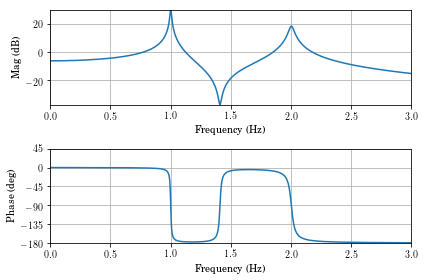

In [140]:
omega, H = vt.sos_frf(M, Damping, K, Bt, Cd, Cv, Ca, .0, 3, 1, 1)

vt.frfplot(omega, H)

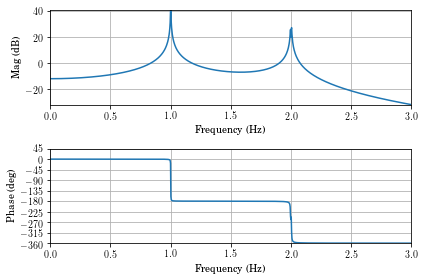

In [241]:
H_all = np.zeros((3,1000,3), dtype = 'complex128')
for i in np.arange(1, 4):
    for j in np.arange(1, 4):
        omega, H_all[i-1,:,j-1] = vt.sos_frf(M, Damping/10, K, Bt, Cd, Cv, Ca, 0, 3, i, j, num_freqs = 1000)
vt.frfplot(omega,H_all[1,:,0])    

In [244]:
_,vals,_ = np.linalg.svd(H_all[:,1,:])
np.sort(vals)

array([ 0.24888327,  0.25069937,  0.9968263 ])

In [246]:
cmifs = np.zeros((max([C.shape[0],B.shape[1]]),max(omega.shape)))

In [293]:
H_all.shape[2]

3

In [288]:
for i, freq in enumerate(omega.reshape(-1)):
    _, vals,_  = np.linalg.svd(H_all[:,i,:])
    cmifs[:,i]= np.sort(vals).T

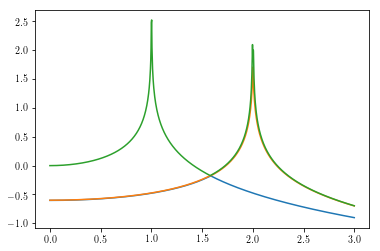

In [291]:
plt.plot(omega.T, np.log10(cmifs.T))

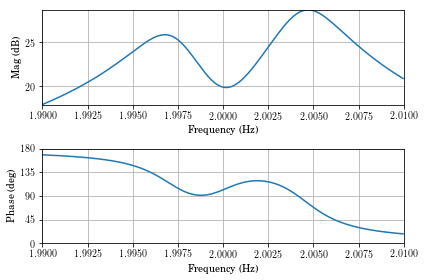

In [204]:
vt.frfplot(omega,H_all[1,:,0])

In [176]:
omega, zeta, Psi = vt.sos_modal(M, K, Damping)
omega

array([ 1.00159514,  1.99721064,  2.00448419])

In [152]:
Psi.T@Damping@Psi

array([[  1.00333333e-02,   1.95991577e-04,  -6.17213400e-05],
       [  1.95991577e-04,   3.99952381e-02,  -1.40213637e-04],
       [ -6.17213400e-05,  -1.40213637e-04,   4.00714286e-02]])

In [287]:
np.sort(vals)

array([ 0.1250499 ,  0.19955444,  0.20072028])

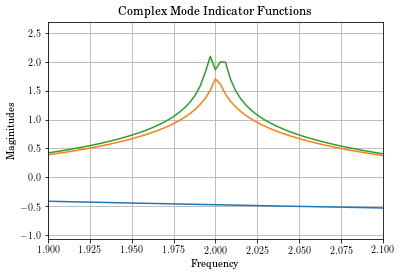

In [302]:
vt.cmif(omega, H_all, freq_min = 1.9, freq_max = 2.1)